In [2]:
#import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import chi2_contingency 
import warnings 
warnings.filterwarnings('ignore')

#import project confiuration
import sys
sys.path.append('..')
import config

#set visualization style
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Set random seed
np.random.seed(config.RANDOM_SEED)

print("Libraries imported successfully")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Configuration loaded successfully!
Project root: C:\Users\hp\Desktop\gaf\Ghana-Armed-Forces-Personnel-Deployment-and-Attrition-Risk-Modeling
Random seed: 42
Target sample size: 1000 personnel
Libraries imported successfully
Matplotlib version: 3.7.2
Seaborn version: 0.12.2


# Load Data 

In [3]:
#load the dataset 
data_path = config.RAW_DATA_DIR/ config.PERSONNEL_DATA_FILE
df = pd.read_csv(data_path)

df['contract_end_data'] = pd.to_datetime(df['contract_end_date'])

print(f"Data loaded successfully")
print(f"Shape: {df.shape}")
print(f"\n Some rows")
df.head()

Data loaded successfully
Shape: (1000, 52)

 Some rows


,personnel_id,name,age,gender,service_branch,rank,MOS,years_of_service,contract_end_date,marital_status,...,peer_rating_score,civilian_job_offers,financial_stress_indicator,family_support_score,relocation_willingness,attrition_risk_score,attrition_risk,readiness_score,readiness_category,contract_end_data
0,MIL00001,Allison Hill,35,Male,Army,Officer,Military Police,18,2026-09-22,Single,...,81.3,0.0,Low,95.6,Low,0.000000,NaN,62.0,Not Ready,2026-09-22
1,MIL00002,Noah Rhodes,23,Female,Army,Junior,Cyber Operations,2,2025-03-01,Divorced,...,NaN,0.0,Low,24.6,High,34.614493,LOW_RISK,70.9,Limited,2025-03-01
2,MIL00003,Angie Henderson,29,Male,Army,Junior,Special Forces,5,2027-01-20,Married,...,73.8,0.0,Low,61.7,Medium,0.000000,NaN,67.3,Not Ready,2027-01-20
3,MIL00004,Daniel Wagner,20,Male,Air Force,Junior,Aviation,5,2028-08-12,Married,...,79.3,1.0,Medium,69.3,Medium,25.940718,LOW_RISK,73.4,Limited,2028-08-12
4,MIL00005,Cristian Santos,21,Female,Navy,Junior,Administration,1,2027-01-20,Married,...,NaN,NaN,Low,38.7,Low,19.649121,LOW_RISK,76.0,Limited,2027-01-20


In [4]:
#info 
print("Dataset Information")
print("-"*60)
df.info()

Dataset Information
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   personnel_id                    1000 non-null   object        
 1   name                            1000 non-null   object        
 2   age                             1000 non-null   int64         
 3   gender                          1000 non-null   object        
 4   service_branch                  1000 non-null   object        
 5   rank                            1000 non-null   object        
 6   MOS                             1000 non-null   object        
 7   years_of_service                1000 non-null   int64         
 8   contract_end_date               1000 non-null   object        
 9   marital_status                  1000 non-null   object      

In [7]:
#summary 
print("\nNumeric Feature Summary")
print("-"*60)
df.describe().round(3).T


Numeric Feature Summary
------------------------------------------------------------


,count,mean,min,25%,50%,75%,max,std
age,1000.0,29.409,18.0,24.0,28.0,35.0,54.0,7.889
years_of_service,1000.0,8.296,0.0,3.0,6.0,12.0,29.0,6.615
dependents,1000.0,2.505,0.0,1.0,2.5,4.0,5.0,1.701
months_until_contract_end,1000.0,24.285,1.0,13.0,25.0,35.0,47.0,13.244
total_training_hours,1000.0,659.587,0.0,256.75,549.5,998.75,2000.0,523.211
specialized_courses_completed,1000.0,4.607,0.0,2.0,4.0,7.0,15.0,3.347
training_score_average,1000.0,80.082,60.0,73.6,79.9,86.7,100.0,9.398
certifications_held,1000.0,3.485,0.0,2.0,3.0,5.0,8.0,1.93
days_since_last_training,1000.0,355.991,2.0,170.75,348.5,548.5,729.0,212.171
training_budget_spent,1000.0,9442.117,0.0,4075.5,8280.0,13155.0,34622.0,7133.439


# Demographic Analysis

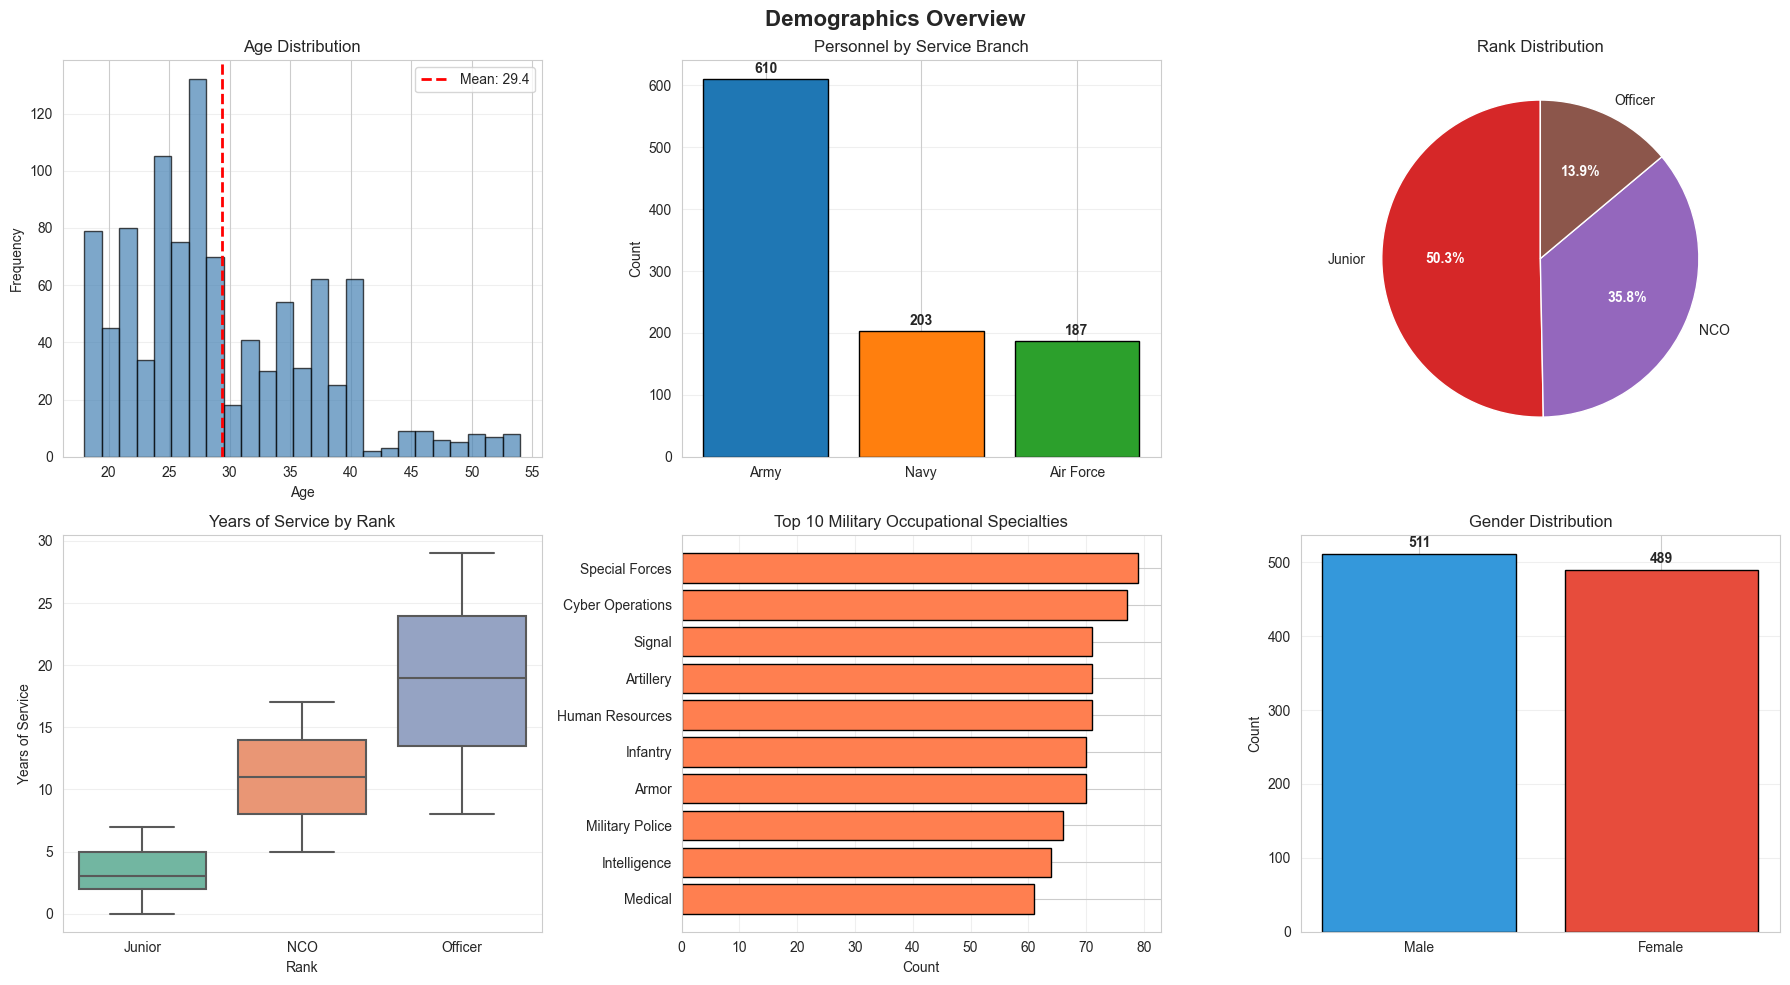

In [12]:
#create demography overview
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Demographics Overview', fontsize=16, fontweight='bold')

# 1. Age distribution
axes[0, 0].hist(df['age'], bins=25, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age"].mean():.1f}')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Service branch distribution
branch_counts = df['service_branch'].value_counts()
colors_branch = ['#1f77b4', '#ff7f0e', '#2ca02c']
axes[0, 1].bar(branch_counts.index, branch_counts.values, color=colors_branch, edgecolor='black')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Personnel by Service Branch')
for i, v in enumerate(branch_counts.values):
    axes[0, 1].text(i, v + 10, str(v), ha='center', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Rank distribution
rank_counts = df['rank'].value_counts()
colors_rank = ['#d62728', '#9467bd', '#8c564b']
wedges, texts, autotexts = axes[0, 2].pie(rank_counts.values, labels=rank_counts.index, 
                                            autopct='%1.1f%%', colors=colors_rank, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
axes[0, 2].set_title('Rank Distribution')

# 4. Years of service by rank (boxplot)
rank_order = ['Junior', 'NCO', 'Officer']
df['rank_ordered'] = pd.Categorical(df['rank'], categories=rank_order, ordered=True)
df_plot = df.sort_values('rank_ordered')
sns.boxplot(data=df_plot, x='rank_ordered', y='years_of_service', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_xlabel('Rank')
axes[1, 0].set_ylabel('Years of Service')
axes[1, 0].set_title('Years of Service by Rank')
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Top 10 MOS
mos_counts = df['MOS'].value_counts().head(10)
axes[1, 1].barh(range(len(mos_counts)), mos_counts.values, color='coral', edgecolor='black')
axes[1, 1].set_yticks(range(len(mos_counts)))
axes[1, 1].set_yticklabels(mos_counts.index)
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Top 10 Military Occupational Specialties')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

# 6. Gender distribution
gender_counts = df['gender'].value_counts()
axes[1, 2].bar(gender_counts.index, gender_counts.values, color=['#3498db', '#e74c3c'], edgecolor='black')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Gender Distribution')
for i, v in enumerate(gender_counts.values):
    axes[1, 2].text(i, v + 10, str(v), ha='center', fontweight='bold')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(config.FIGURES_DIR / 'eda_demographics.png', dpi=300, bbox_inches='tight')
plt.show()



In [13]:
#demographics summary statistics
print("\nDemographics Summary:")
print("-" * 60)
print(f"Average Age: {df['age'].mean():.1f} years (σ={df['age'].std():.1f})")
print(f"Average Years of Service: {df['years_of_service'].mean():.1f} years")
print(f"\nService Branch Breakdown:")
print(df['service_branch'].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))
print(f"\nRank Breakdown:")
print(df['rank'].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))
print(f"\nGender Breakdown:")
print(df['gender'].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))


Demographics Summary:
------------------------------------------------------------
Average Age: 29.4 years (σ=7.9)
Average Years of Service: 8.3 years

Service Branch Breakdown:
service_branch
Army         61.0%
Navy         20.3%
Air Force    18.7%
Name: proportion, dtype: object

Rank Breakdown:
rank
Junior     50.3%
NCO        35.8%
Officer    13.9%
Name: proportion, dtype: object

Gender Breakdown:
gender
Male      51.1%
Female    48.9%
Name: proportion, dtype: object
